## Determinando se novas ofertas e ou clientes resultarão na contratação do serviço de depósito a prazo fixo.
<br>
<div position="relative">
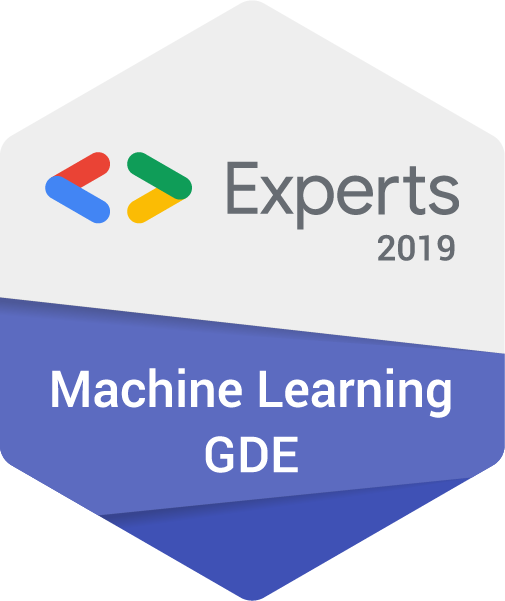
    <div align="left" style="padding:20px;padding-top:40px"> <strong>Autor:</strong> Fillipe Dornelas <br> <strong>Email:</strong> dornelasfillipe@gmail.com <br> Google Developer Expert @ Machine Learning </div>
</div>

In [6]:
!pip install pandas tensorflow scikit-learn seaborn matplotlib

  Using cached https://files.pythonhosted.org/packages/52/3f/f6a428599e0d4497e1595030965b5ba455fd8ade6e977e3c819973c4b41d/pandas-0.25.3-cp36-cp36m-manylinux1_x86_64.whl
  Using cached https://files.pythonhosted.org/packages/de/f0/96fb2e0412ae9692dbf400e5b04432885f677ad6241c088ccc5fe7724d69/tensorflow-1.14.0-cp36-cp36m-manylinux1_x86_64.whl
  Using cached https://files.pythonhosted.org/packages/a0/c5/d2238762d780dde84a20b8c761f563fe882b88c5a5fb03c056547c442a19/scikit_learn-0.21.3-cp36-cp36m-manylinux1_x86_64.whl
    100% |████████████████████████████████| 215kB 1.6MB/s ta 0:00:01
    100% |████████████████████████████████| 13.1MB 253kB/s ta 0:00:01
  Using cached https://files.pythonhosted.org/packages/d2/ab/43e678759326f728de861edbef34b8e2ad1b1490505f20e0d1f0716c3bf4/numpy-1.17.4-cp36-cp36m-manylinux1_x86_64.whl
  Using cached https://files.pythonhosted.org/packages/e7/f9/f0b53f88060247251bf481fa6ea62cd0d25bf1b11a87888e53ce5b7c8ad2/pytz-2019.3-py2.py3-none-any.whl
  Using cached https:

In [7]:
import pandas as pd
import numpy as np

# Importando dados para análise

In [8]:
data = pd.read_csv("dataset/bank-full.csv",sep=";")

#### bank client data:
1 - age (numeric)<br>
2 - job : type of job (categorical: 'admin.','blue-collar','entrepreneur','housemaid','management','retired','self-employed','services','student','technician','unemployed','unknown')<br>
3 - marital : marital status (categorical: 'divorced','married','single','unknown'; note: 'divorced' means divorced or widowed)<br>
4 - education (categorical: 'basic.4y','basic.6y','basic.9y','high.school','illiterate','professional.course','university.degree','unknown')<br>
5 - default: has credit in default? (categorical: 'no','yes','unknown')<br>
6 - housing: has housing loan? (categorical: 'no','yes','unknown')<br>
7 - loan: has personal loan? (categorical: 'no','yes','unknown')<br>
#### related with the last contact of the current campaign:
8 - contact: contact communication type (categorical: 'cellular','telephone')<br>
9 - month: last contact month of year (categorical: 'jan', 'feb', 'mar', ..., 'nov', 'dec')<br>
10 - day_of_week: last contact day of the week (categorical: 'mon','tue','wed','thu','fri')<br>
11 - duration: last contact duration, in seconds (numeric). Important note: this attribute highly affects the output target (e.g., if duration=0 then y='no'). Yet, the duration is not known before a call is performed. Also, after the end of the call y is obviously known. Thus, this input should only be included for benchmark purposes and should be discarded if the intention is to have a realistic predictive model.<br>
#### other attributes:
12 - campaign: number of contacts performed during this campaign and for this client (numeric, includes last contact)<br>
13 - pdays: number of days that passed by after the client was last contacted from a previous campaign (numeric; 999 means client was not previously contacted)<br>
14 - previous: number of contacts performed before this campaign and for this client (numeric)<br>
15 - poutcome: outcome of the previous marketing campaign (categorical: 'failure','nonexistent','success')<br>
#### social and economic context attributes
16 - emp.var.rate: employment variation rate - quarterly indicator (numeric)<br>
17 - cons.price.idx: consumer price index - monthly indicator (numeric)<br>
18 - cons.conf.idx: consumer confidence index - monthly indicator (numeric)<br>
19 - euribor3m: euribor 3 month rate - daily indicator (numeric)<br>
20 - nr.employed: number of employees - quarterly indicator (numeric)<br>

Output variable (desired target):
21 - y - has the client subscribed a term deposit? (binary: 'yes','no')

In [9]:
data.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


# Separando dados entre numéricos e categóricos.
Muito necessário para que o escalonamento seja correto e também um passo fundamental para avaliar correlações e covariância.

In [10]:
numeric_features = ["age","balance","day","duration","campaign","pdays","previous"]
categorical_features = ["job","marital","education","default","housing","loan","contact","month","poutcome"]
target = ["y"]

# Escalonando dados para melhor desempenho computacional
Os dados numéricos poderiam não ser escalonados, mas em casos onde a ordem de grandeza dos dados é alta, os cálculos podem ''estourar'' a capacidade da variável.

In [11]:
from sklearn.preprocessing import MinMaxScaler, LabelEncoder

In [12]:
scaler_numeric = MinMaxScaler()
scaler_categorical = LabelEncoder()

In [13]:
data[numeric_features] = scaler_numeric.fit_transform(data[numeric_features])

#escalonando cada coluna categórica
for i in categorical_features:
    data[i] = scaler_categorical.fit_transform(data[i])

data[target] = scaler_categorical.fit_transform(data[target].values.ravel())

In [14]:
data.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,0.519481,4,1,2,0,0.092259,1,0,2,0.133333,8,0.053070,0.0,0.0,0.0,3,0
1,0.337662,9,2,1,0,0.073067,1,0,2,0.133333,8,0.030704,0.0,0.0,0.0,3,0
2,0.194805,2,1,1,0,0.072822,1,1,2,0.133333,8,0.015453,0.0,0.0,0.0,3,0
3,0.376623,1,1,3,0,0.086476,1,0,2,0.133333,8,0.018707,0.0,0.0,0.0,3,0
4,0.194805,11,2,3,0,0.072812,0,0,2,0.133333,8,0.040260,0.0,0.0,0.0,3,0


In [15]:
from sklearn.model_selection import train_test_split

In [16]:
all_labels = numeric_features+categorical_features

# Plotando Pair Plots
Esta técnica permite visualizar como os dados se relacionam a partir da distribuição no espaço amostral.
Ref.: https://seaborn.pydata.org/generated/seaborn.pairplot.html

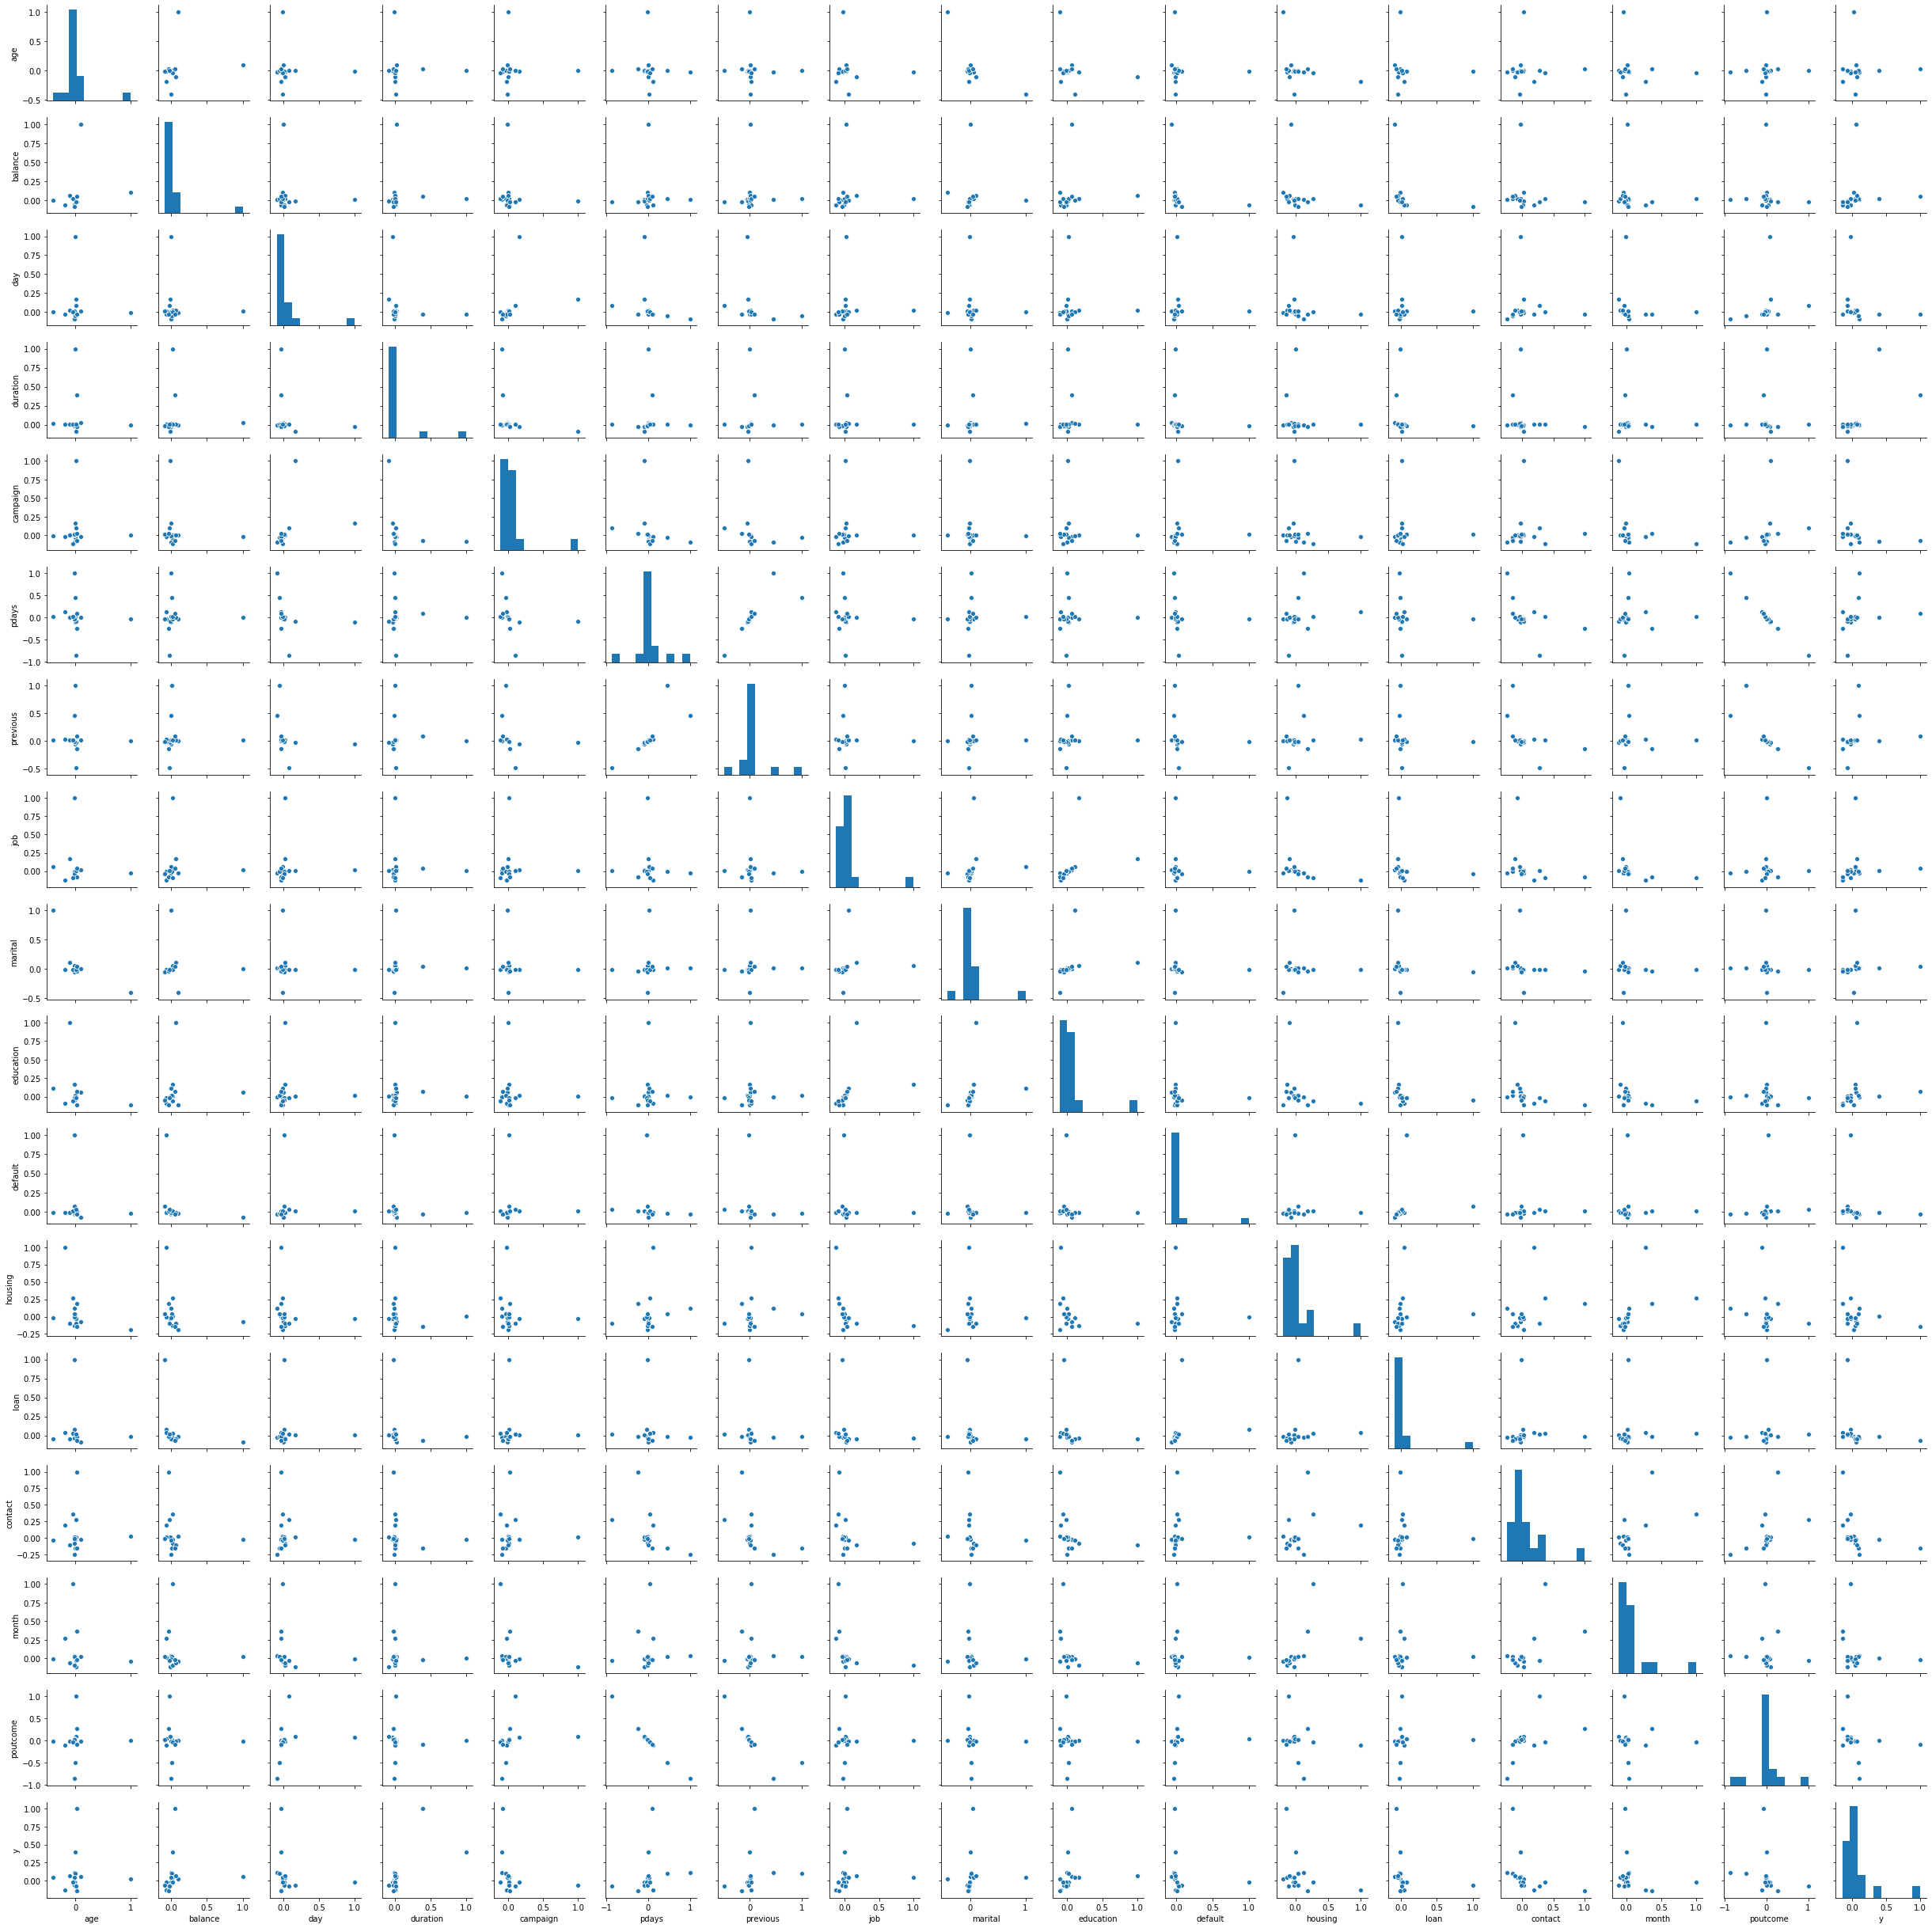

In [24]:
import seaborn as sns
corr = data[all_labels+["y"]].corr()
sns.pairplot(corr, size=2.0)
import matplotlib.pyplot as plt
plt.show()

# Plotando Matriz de Covariância
Esta técnica usa da correlação para mostrar ''a direção'' entre as features e como o coeficiente calculado delas pode (ou não) estar relacionado.
Ref.: https://towardsdatascience.com/let-us-understand-the-correlation-matrix-and-covariance-matrix-d42e6b643c22

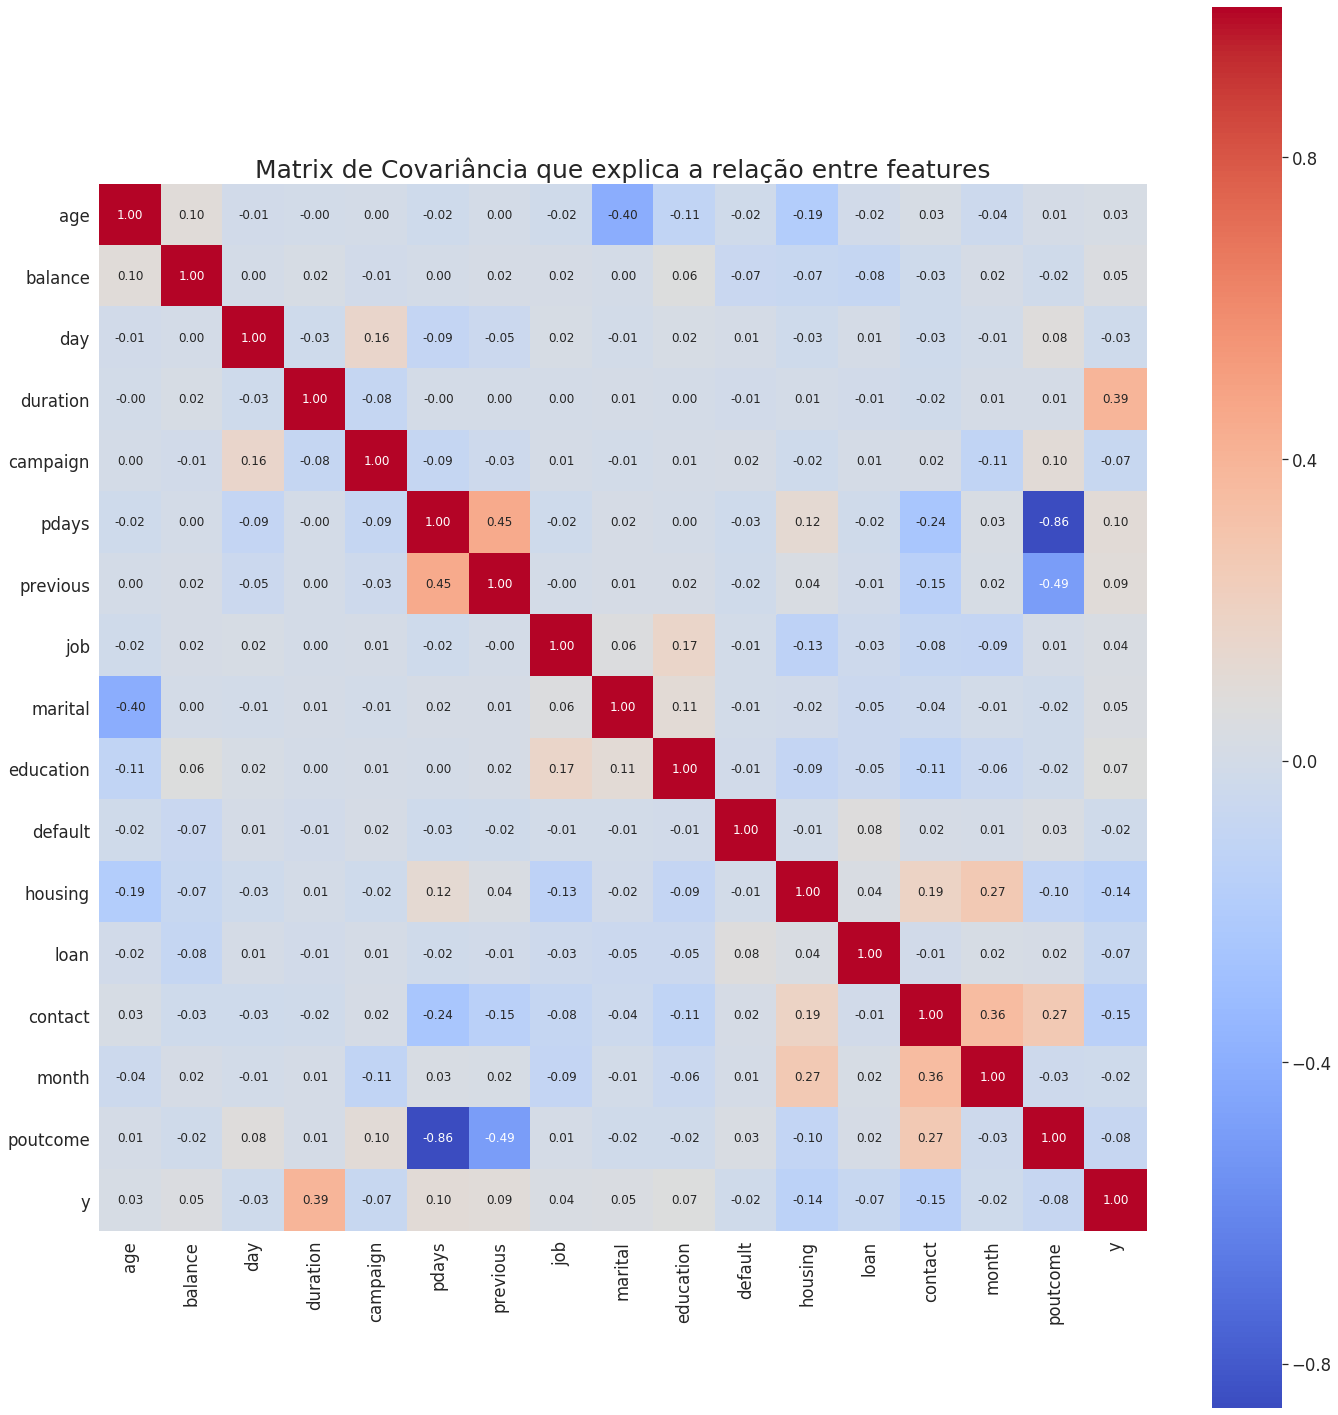

In [25]:
plt.figure(figsize=(20,20))
sns.set(font_scale=1.5)
hm = sns.heatmap(corr,
                 cbar=True,
                 annot=True,
                 square=True,
                 fmt='.2f',
                 annot_kws={'size': 12},
                 cmap='coolwarm',                 
                 yticklabels=all_labels+["y"],
                 xticklabels=all_labels+["y"])
plt.title('Matrix de Covariância que explica a relação entre features', size = 25)
plt.tight_layout()
plt.show()

# Separando dataset em treino e teste
Importante ressaltar que a parte de teste nunca é vista pelo cassificador, então o retorno (val_loss e val_acc) representa o quanto o algoritmo aprendeu e conseguiu inferir (classificar) os novos dados.

In [45]:
X_train, x_test, Y_train,y_test = train_test_split(data[all_labels],data[target], test_size = 0.33, random_state=True)

In [46]:
len(X_train), len(x_test), len(Y_train), len(y_test)

(30291, 14920, 30291, 14920)

In [47]:
import tensorflow as tf

# Treinamento

Nesta etapa foi escolhido o uso de Deep Learning para estar alinhado com as técnicas mais avançadas. O resultado é um Rede Neural Profunda totalmente conectada, com acurácia registrada (na etapa de validação) de 88.4%

In [48]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.regularizers import l1


In [49]:
model = Sequential()

In [50]:
model.add(Dense(64))
model.add(Dropout(0.3))
model.add(Dense(2, activation='sigmoid',kernel_regularizer=l1(0.08)))
model.compile(loss='sparse_categorical_crossentropy', optimizer="nadam",metrics=['accuracy'])

In [51]:
model.fit(X_train.values, Y_train.values,
          batch_size=32,
          epochs=4,
          validation_data=[x_test.values, y_test.values])

Train on 30291 samples, validate on 14920 samples
Epoch 1/4
30291/30291 [==============================] - 1s 36us/sample - loss: 0.7986 - acc: 0.8699 - val_loss: 0.4017 - val_acc: 0.8847
Epoch 2/4
30291/30291 [==============================] - 1s 34us/sample - loss: 0.3994 - acc: 0.8822 - val_loss: 0.3742 - val_acc: 0.8847
Epoch 3/4
30291/30291 [==============================] - 1s 34us/sample - loss: 0.3805 - acc: 0.8822 - val_loss: 0.3659 - val_acc: 0.8847
Epoch 4/4
30291/30291 [==============================] - 1s 34us/sample - loss: 0.3720 - acc: 0.8822 - val_loss: 0.3601 - val_acc: 0.8847


In [52]:
scores = model.evaluate(np.array(x_test), np.array(y_test))

14920/14920 [==============================] - 0s 13us/sample - loss: 0.3601 - acc: 0.8847


In [66]:
print(f"Acurácia do modelo treinado: {scores[1]*100}")


Acurácia do modelo treinado: 88.47184777259827


# Inferência

In [83]:
new_value = [[[0.39,2,1,1,0,0.072822,1,1,2,0.133333,8,0.015453,0.0,0.0,0.0,3]]]

In [84]:
pred = model.predict(new_value)

In [85]:
flag = np.argmax(pred)

In [86]:
final = {0:"Não",1:"Sim"}

## Resultará em contratação?

In [87]:
print(f"Resultado: {final.get(flag)}, Acurácia: {pred[0][0]}")

Resultado: Não, Acurácia: 0.7229645252227783
